In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("jobs.csv")

In [3]:
df.head()

,Unnamed: 0


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# cleaning
df['Reviews'] = df['Reviews'].apply( lambda r: r.strip('()').split()[0] )
df['Reviews'] = df['Reviews'].astype('int')

<AxesSubplot:ylabel='Title'>

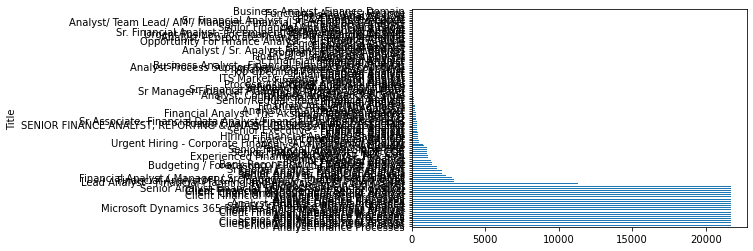

In [ ]:
df.sort_values('Reviews', ascending=False).set_index('Title')['Reviews'].top(10).plot(kind='barh')

In [ ]:
# cleaning
df['Location'] = df['Location'].apply( lambda r: r.split('(')[0].strip() )

<AxesSubplot:xlabel='Location'>

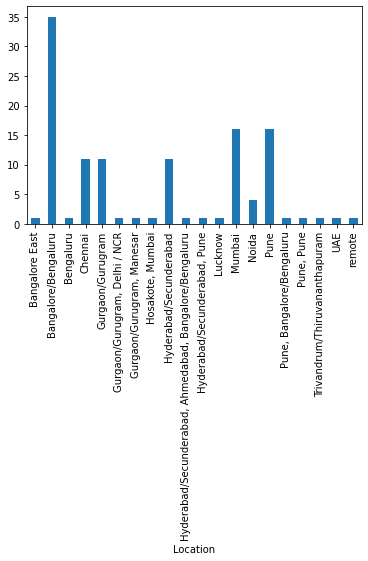

In [ ]:
df.groupby('Location').count()['Title'].plot(kind = 'bar')

In [ ]:
# cleaning
df['Experience'] = df['Experience'].apply( lambda r: r.split('(')[0].strip() )

<AxesSubplot:xlabel='Experience'>

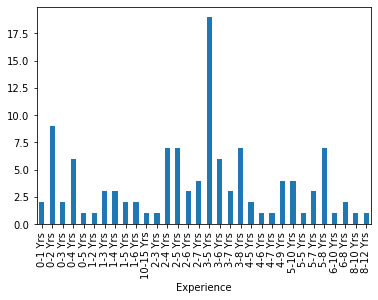

In [ ]:
df.groupby('Experience').count()['Title'].plot(kind = 'bar')

In [ ]:
# cleaning
df['Salary'] = df['Salary'].apply( lambda r: r.split('(')[0].strip() )

<AxesSubplot:xlabel='Salary'>

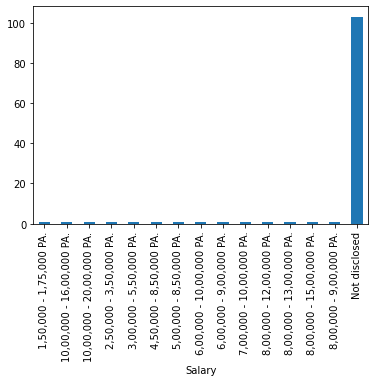

In [ ]:
df.groupby('Salary').count()['Title'].plot(kind = 'bar')

<AxesSubplot:xlabel='Company'>

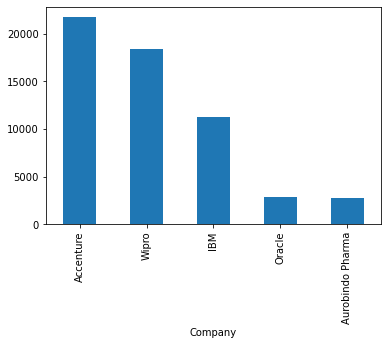

In [ ]:
df.set_index('Company').groupby('Company').max().sort_values('Reviews', ascending=False)['Reviews'].head().plot(kind = "bar")

<AxesSubplot:ylabel='Frequency'>

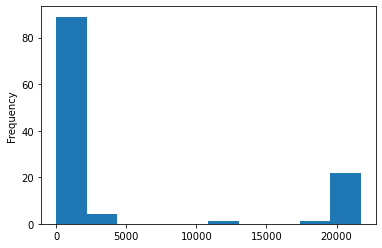

In [ ]:
df['Reviews'].plot(kind = "hist")


<AxesSubplot:ylabel='Title'>

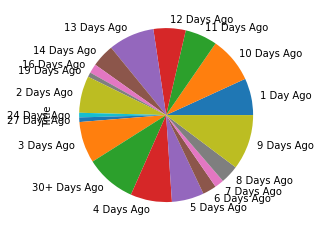

In [ ]:
df.groupby('Job_Post_History').count()['Title'].plot(kind = 'pie')

In [ ]:
df = pd.DataFrame({'year': [],'month': [],'day': []})
df['date'] = pd.to_datetime(df)
df

,year,month,day,date


In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
title_text = ' '.join(df.Title.values)

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(title_text)

In [ ]:
import matplotlib.pyplot as plt

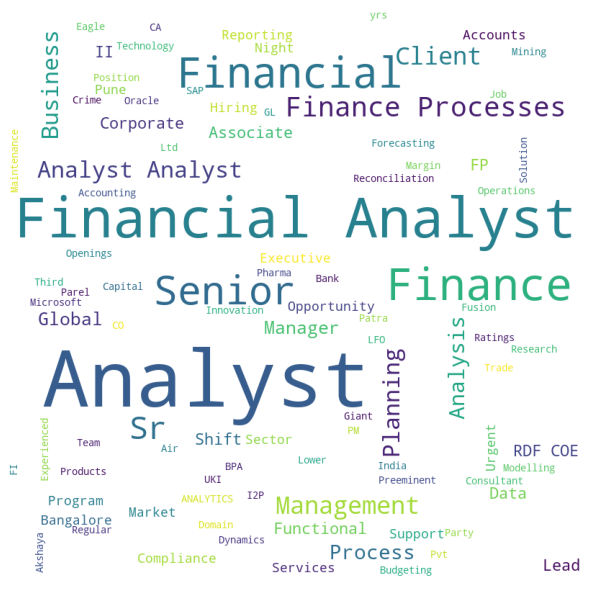

In [ ]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()